In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from numpy import array
from collections import Counter
import random
import string 



In [2]:
import io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# other import
import os
import time
import itertools
from unicodedata import normalize
from functools import reduce



In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
from nltk.stem import WordNetLemmatizer 


In [4]:
import contractions
import datetime
from textblob import TextBlob
import operator
from sklearn.model_selection import train_test_split
from collections import Counter
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import time
from tqdm import tqdm


In [5]:
from gensim.models.wrappers import LdaMallet



In [6]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models, similarities, matutils



In [7]:
from gensim.models import ldamodel
from gensim.test.utils import datapath


In [8]:
# spacy for lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")
import pickle
from spacy.lang.en.stop_words import STOP_WORDS



In [9]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # important
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline


In [10]:
# Parallelize prediction
import multiprocessing


In [15]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [16]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [17]:
import findspark
findspark.init()

from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


In [18]:
import configparser
import psycopg2


In [19]:
post = pd.read_csv('community_post_v1.csv')


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



In [20]:
post =post.loc[post['kind']=='POST'][post['written_language']=='english']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [21]:
post.head(2)


,id,textid,email_lang,origin_country_id,origin_city_id,origin_city_name,living_country_id,living_city_id,living_city_name,locale,...,intro,interest,author_id,create_by,create_at,author_id.1,content,kind,written_language,learning_language.1
7,8352108.0,,pt,BR,ZZ00000,NaN,BR,ZZ00000,NaN,pt,...,NaN,NaN,8352108,8352108,4/1/2021 04:58:40,8352108,I would like to find a partner to practice The...,POST,english,english
14,8362083.0,,en-us,JP,ZZ00000,NaN,CA,CA00011,NaN,en-us,...,NaN,NaN,8362083,8362083,7/1/2021 21:00:57,8362083,Today I recommend to you one of my favorite bo...,POST,english,NaN


In [22]:
print('There are', post['create_by'].nunique(), 'unique authors.')
print('There are', post['living_country_id'].nunique(), 'unique countries.')
print('There are', post['content'].nunique(),'unique posts.')


There are 82506 unique authors.
There are 222 unique countries.
There are 175660 unique posts.


In [23]:
count = array(post['content'])
count[0]


'I would like to find a partner to practice The english language. I teach Brazilian Portuguese and you teach me English. If anyone is interested leave  msg.'

In [24]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
tokens = word_tokenize(str(post['content']))


In [227]:
post.isnull().sum()


id                          4
textid                      4
email_lang                  4
origin_country_id          25
origin_city_id           7814
origin_city_name       162776
living_country_id          17
living_city_id           5007
living_city_name       162818
locale                      4
timezone                  757
timezone_iana               4
currency                    4
learning_language       10794
intro                   82220
interest               114490
author_id                   0
create_by                   0
create_at                   0
author_id.1                 0
content                     2
kind                        0
written_language            0
learning_language.1     18013
dtype: int64

In [25]:
post=post.dropna(subset=['content'])
post=post.dropna(subset=['living_country_id'])


In [54]:
country_grouped = post.groupby('living_country_id').content.nunique().filter(lambda x:(post[content].nunique)x > 6000).sort_values(ascending=False).to_frame()
#country_grouped

SyntaxError: invalid syntax (<ipython-input-54-b3f501e13994>, line 1)

In [26]:
# remove non-alphabetic charactors
def all_alpha(doc):
    return ' '.join([w.lower() for w in doc.split() if w.isalpha()])
post['Alpha']=post['content'].apply(all_alpha)


In [28]:
# basic tokenization and expand contraction
def expand_contraction(doc):
    return ' '.join([contractions.fix(token) for token in doc.split()])

post['ContentExpand']=post['Alpha'].apply(expand_contraction)


In [29]:
# use this function after expand_contraction
start_time=time.time()
def clean_content(doc):
    a=' '.join([re.sub(r"[^a-zA-Z0-9]+", ' ', token) for token in doc.split()])
    #res = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, test_list)) 
    return ' '.join(list(filter(str.strip, [token.text for token in nlp(a) if not (token.is_punct or token.is_stop)])))
post['clean']=post['ContentExpand'].apply(clean_content)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2184.900412797928 seconds ---


In [35]:
#use this function after review_clean
start_time=time.time()
def clean_content_lemma(word_list):
    return ' '.join([word.lemma_ for word in nlp(word_list)])
post['lemma']=post['clean'].apply(clean_content_lemma)
print("--- %s seconds ---" % (time.time() - start_time))


--- 1570.455983877182 seconds ---


In [40]:
# remove tokens with length <3
start_time= time.time()
def longer_words(text):
    return ' '.join(token for token in text.split() if len(token)>2)
    
post['longer']= post['lemma'].apply(longer_words)

In [42]:
longer_array = array(post['longer'])
longer_array[0]

'like find partner practice english teach brazilian portuguese teach interested leave'

In [49]:
#post[post['longer'].str.contains('hi')]['longer'].count()
content_tokens = word_tokenize(str(post['content']))
len(content_tokens)

775

In [53]:
#post[post['longer'].str.contains('hello')]['longer'].count()
longer_tokens = word_tokenize(str(post['longer']))
len(longer_tokens)

498

In [54]:
add_words = ['hi','hello','helloo','hellooo','helloooo']
stop_words = set(stopwords.words("english"))
stop_added = stop_words.union(add_words)


In [55]:
post['add_stop'] = post['longer'].apply(lambda x: " ".join(x for x in x.split() if x not in add_words))

In [56]:
added_token = word_tokenize(str(post['add_stop']))
len(added_token)

497

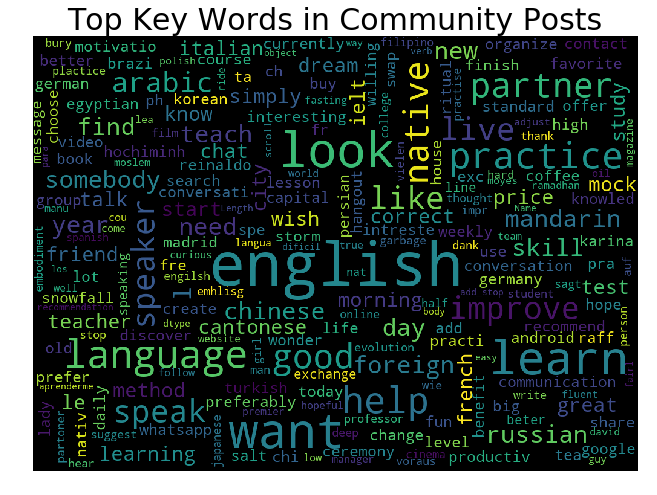

In [57]:
from wordcloud import WordCloud, STOPWORDS
wordcloudimage = WordCloud( max_words=250,
                            font_step=2 ,
                            max_font_size=100,
                            stopwords=stop_added,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(str(post['add_stop']))
 
plt.figure(figsize=(20,8))
plt.title('Top Key Words in Community Posts', fontsize = '30')
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()


In [58]:
from textblob import TextBlob


In [59]:
text = TextBlob(str(post['add_stop']))


In [60]:
NounPhrases=text.noun_phrases


In [61]:
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    

In [62]:
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)


##### Important word combinations ####
partner_practice_english brazi_... favorite_book motivatio_... native_english_look_lesson foreign_friend_native_english_speaker_pra_... practice_english interesting_chi_... method_productiv_... italian_teacher_communication weekly_fre_... great_ceremony_lot practice_french fr_... native_high_level_l_... good_morning french_speaker practice_english practice_egyptian_arabic_persian_tea_... italian_look_partner practice_english_exc_... big_snowfall_storm_madrid_day life_ch_... chinese_native standard_mandarin_chinese_... hochiminh_city native_speaker_practi_... german_need_nativ_... conversation_english day_ritual_morning raff_coffee_salt_... native_russian_look_english_russian_conversati_... whatsapp_english_group fun_learning_language finish_english_course english_skill_ta_... old_lady capital_city_wonder english_message reinaldo_year_look new_friend_spe_... english_language_hope_benefit english_l_..._... good_video google_hangout_good_android_ph_.

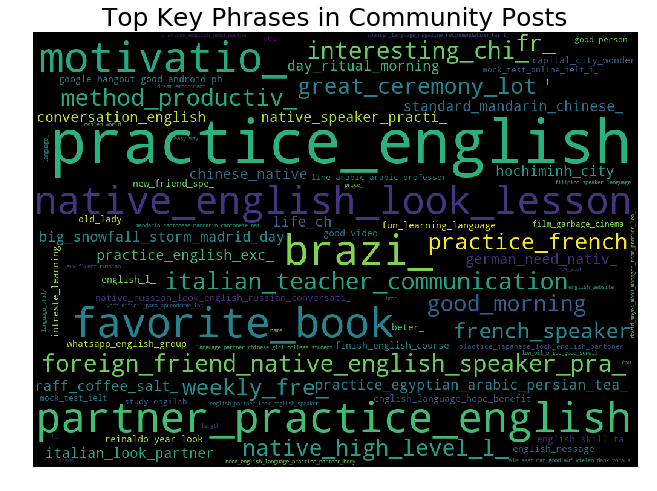

In [63]:
wordcloudimage = WordCloud( max_words=100,
                            font_step=2 ,
                            max_font_size=100,
                            stopwords=stop_words,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)
 
plt.figure(figsize=(20,8))
plt.title('Top Key Phrases in Community Posts', fontsize ='25')
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()


In [64]:
def get_top_n_ngrams(corpus, n=None, ng=None):
    vec = CountVectorizer(ngram_range=(ng,ng)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [66]:
common_words = get_top_n_ngrams(post['add_stop'], 25,2)
    
df1 = pd.DataFrame(common_words, columns = ['add_stop', 'count'])
df1.groupby('add_stop').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 phrases (bigram) in posts after text cleaning')


In [183]:
common_words = get_top_n_ngrams(post['add_stop'], 25,3)
    
df1 = pd.DataFrame(common_words, columns = ['add_stop', 'count'])
df1.groupby('add_stop').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 trigrams in posts after text cleaning')

TypeError: string indices must be integers

In [242]:

start_time=time.time()
polarity=pola.apply(lambda x:TextBlob(x).sentiment.polarity)
print("--- %s seconds ---" % (time.time() - start_time))


--- 41.134774684906006 seconds ---


In [214]:
print("2 Random Posts with Highest Polarity:")
for index,post in enumerate(polarity.iloc[polarity.nlargest(2,'polariti').index]['add_stop']):
    print('Post {}:\n'.format(index+1),post)
    

2 Random Posts with Highest Polarity:


AttributeError: 'str' object has no attribute 'iloc'

In [70]:
#post length
post['Content_len']=post['add_stop'].astype(str).apply(len)
post['Content_cnt']=post['add_stop'].apply(lambda x: len(str(x).split()))

In [71]:
post.head(3)

,id,textid,email_lang,origin_country_id,origin_city_id,origin_city_name,living_country_id,living_city_id,living_city_name,locale,...,written_language,learning_language.1,Alpha,ContentExpand,clean,lemma,longer,add_stop,Content_len,Content_cnt
7,8352108.0,,pt,BR,ZZ00000,NaN,BR,ZZ00000,NaN,pt,...,english,english,i would like to find a partner to practice the...,i would like to find a partner to practice the...,like find partner practice english teach brazi...,like find partner practice english teach brazi...,like find partner practice english teach brazi...,like find partner practice english teach brazi...,84,11
14,8362083.0,,en-us,JP,ZZ00000,NaN,CA,CA00011,NaN,en-us,...,english,NaN,today i recommend to you one of my favorite bo...,today i recommend to you one of my favorite bo...,today recommend favorite books changed motivat...,today recommend favorite book change motivatio...,today recommend favorite book change motivatio...,today recommend favorite book change motivatio...,206,29
15,8372987.0,,en-us,NZ,NZ00001,NaN,US,US00016,NaN,en-us,...,english,NaN,i am a native english i am not looking for les...,i am a native english i am not looking for les...,native english looking lessons simply want hel...,native english look lesson simply want help le...,native english look lesson simply want help le...,native english look lesson simply want help le...,86,13


In [72]:
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words


In [73]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        

In [323]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
topic_df=post['longer']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
topic_df=topic_df.values
document_term_matrix = tfidf_vectorizer.fit_transform(topic_df)
document_term_matrix_name=tfidf_vectorizer.get_feature_names()

bow_vectorizer = CountVectorizer()
bow_corpus = bow_vectorizer.fit_transform(topic_df)
bow_feature_names_corpus = bow_vectorizer.get_feature_names()


In [324]:
# BOW 3 topics using the longer column
start_time=time.time()
no_topics = 3
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_bow_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(bow_corpus)
no_top_words = 10
display_topics(lda_bow_corpus, bow_feature_names_corpus, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic  0
think, new, people, know, good, like, time, use, word, read

Topic  1
english, learn, want, help, language, look, speak, practice, native, improve

Topic  2
like, watch, know, country, love, movie, word, favorite, song, difference
--- 575.7240037918091 seconds ---


In [326]:
# BOW 4 topics using the longer column
start_time=time.time()
no_topics = 4
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_bow_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(bow_corpus)
no_top_words = 10
display_topics(lda_bow_corpus, bow_feature_names_corpus, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic  0
help, english, want, practice, need, spanish, improve, talk, like, portuguese

Topic  1
english, learn, language, want, speak, look, native, help, partner, like

Topic  2
people, think, like, time, day, know, good, love, country, life

Topic  3
new, word, know, use, like, think, write, read, good, find
--- 675.7537009716034 seconds ---


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
topic_df=post['add_stop']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
topic_df=topic_df.values
document_term_matrix = tfidf_vectorizer.fit_transform(topic_df)
document_term_matrix_name=tfidf_vectorizer.get_feature_names()

bow_vectorizer = CountVectorizer()
bow_corpus = bow_vectorizer.fit_transform(topic_df)
bow_feature_names_corpus = bow_vectorizer.get_feature_names()


In [248]:
#bag of words using the add_stop column
start_time=time.time()
no_topics = 3
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_bow_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(bow_corpus)
no_top_words = 10
display_topics(lda_bow_corpus, bow_feature_names_corpus, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic 0:
english learn want help language look speak practice native improve
Topic 1:
like de difference day love mean know accent use favorite
Topic 2:
think people know like new good time word use find


In [325]:
#bow using the longer column
start_time=time.time()
no_topics = 2
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_bow_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(bow_corpus)
no_top_words = 20
display_topics(lda_bow_corpus, bow_feature_names_corpus, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic  0
like, think, know, people, new, good, word, time, use, day

Topic  1
english, learn, want, help, language, look, speak, practice, native, improve
--- 577.6463911533356 seconds ---


In [249]:
# bow
start_time=time.time()
no_topics = 4
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_bow_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(bow_corpus)
no_top_words = 20
display_topics(lda_bow_corpus, bow_feature_names_corpus, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic 0:
new time work people good day year think teacher like
Topic 1:
think word like know people use mean thing tell love
Topic 2:
english want learn help practice speak improve look partner language
Topic 3:
english language native like learn look help spanish speaker speak
--- 708.3208990097046 seconds ---


In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
topic_df=post['longer']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
topic_df=topic_df.values
document_term_matrix = tfidf_vectorizer.fit_transform(topic_df)
document_term_matrix_name=tfidf_vectorizer.get_feature_names()

bow_vectorizer = CountVectorizer()
bow_corpus = bow_vectorizer.fit_transform(topic_df)
bow_feature_names_corpus = bow_vectorizer.get_feature_names()

In [328]:
# tfidf using the longer column, 4 topics
start_time=time.time()
no_topics = 4
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_tfidf_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(document_term_matrix)
no_top_words = 20
display_topics(lda_tfidf_corpus, document_term_matrix_name, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic  0
english, learn, help, want, language, practice, look, speak, improve, partner, native, spanish, need, like, teach, speaker, friend, exchange, talk, interested

Topic  1
favorite, speaking, like, group, skill, skype, english, practise, song, practice, partner, favourite, test, old, oral, girl, vietnamese, voice, search, improve

Topic  2
think, know, use, people, word, good, time, like, tell, read, mean, way, work, question, new, thing, write, ask, sentence, different

Topic  3
talk, ielt, day, happy, exam, prepare, guy, wish, eat, country, beautiful, food, topic, world, want, discuss, visit, number, like, travel
--- 368.02809882164 seconds ---


In [329]:
# tfidf using the longer column, 3 topics
start_time=time.time()
no_topics = 3
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_tfidf_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(document_term_matrix)
no_top_words = 20
display_topics(lda_tfidf_corpus, document_term_matrix_name, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic  0
think, know, people, use, good, word, time, way, new, tell, thing, difference, question, like, mean, read, work, different, write, understand

Topic  1
like, book, favorite, day, movie, watch, song, country, love, listen, place, know, music, travel, good, recommend, year, lesson, favourite, new

Topic  2
english, want, help, learn, practice, look, language, speak, improve, partner, native, like, spanish, need, talk, teach, speaker, friend, exchange, chinese
--- 368.7052872180939 seconds ---


In [322]:
# tfidf using the longer column, 3 topics
start_time=time.time()
no_topics = 2
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # eta > 0
lda_tfidf_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(document_term_matrix)
no_top_words = 20
display_topics(lda_tfidf_corpus, document_term_matrix_name, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))


Topic  0
english, learn, want, help, practice, look, language, speak, improve, partner, native, like, spanish, need, talk, teach, speaker, friend, exchange, chinese

Topic  1
think, know, like, good, people, use, word, time, tell, read, day, thing, mean, book, way, new, write, love, difference, country
--- 343.13406324386597 seconds ---


In [250]:
#tfidf 3 topics 
start_time=time.time()
no_topics = 3
doc_topic = 0.5  # alpha > 0
topic_word = 0.5 # beta > 0
lda_tfidf_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic,
                                           topic_word_prior = topic_word).fit(document_term_matrix)
no_top_words = 10
display_topics(lda_tfidf_corpus, document_term_matrix_name, no_top_words)
print("--- %s seconds ---" % (time.time() - start_time))

Topic 0:
favorite like group country movie watch day song travel world
Topic 1:
think know use people word good time way read like
Topic 2:
english want help learn practice look language speak improve partner
--- 349.8135721683502 seconds ---


In [302]:
before_docs = array(post['lemma'])
before_docs[0]

'like find partner practice english teach brazilian portuguese teach interested leave'

In [305]:
before_docs = array(post['clean'])
before_docs[0]

'like find partner practice english teach brazilian portuguese teach interested leave'

In [306]:
before_docs = array(post['ContentExpand'])
before_docs[0]

'i would like to find a partner to practice the english i teach brazilian portuguese and you teach me if anyone is interested leave'

In [307]:
before_docs = array(post['Alpha'])
before_docs[0]

'i would like to find a partner to practice the english i teach brazilian portuguese and you teach me if anyone is interested leave'

In [303]:
before_docs = array(post['content'])
before_docs[0]

'I would like to find a partner to practice The english language. I teach Brazilian Portuguese and you teach me English. If anyone is interested leave  msg.'

In [304]:
post.head()

,id,textid,email_lang,origin_country_id,origin_city_id,origin_city_name,living_country_id,living_city_id,living_city_name,locale,...,author_id.1,content,kind,written_language,learning_language.1,Alpha,ContentExpand,clean,lemma,add_stop
7,8352108.0,,pt,BR,ZZ00000,NaN,BR,ZZ00000,NaN,pt,...,8352108,I would like to find a partner to practice The...,POST,english,english,i would like to find a partner to practice the...,i would like to find a partner to practice the...,like find partner practice english teach brazi...,like find partner practice english teach brazi...,like find partner practice english teach brazi...
14,8362083.0,,en-us,JP,ZZ00000,NaN,CA,CA00011,NaN,en-us,...,8362083,Today I recommend to you one of my favorite bo...,POST,english,NaN,today i recommend to you one of my favorite bo...,today i recommend to you one of my favorite bo...,today recommend favorite books changed motivat...,today recommend favorite book change motivatio...,today recommend favorite book change motivatio...
15,8372987.0,,en-us,NZ,NZ00001,NaN,US,US00016,NaN,en-us,...,8372987,hullo! i am a native english speaker. i am not...,POST,english,NaN,i am a native english i am not looking for les...,i am a native english i am not looking for les...,native english looking lessons simply want hel...,native english look lesson simply want help le...,native english look lesson simply want help le...
20,8381115.0,,en-us,GB,ZZ00000,NaN,GB,ZZ00000,NaN,en-us,...,8381115,hi everyone I'm looking for a foreign friend ...,POST,english,NaN,hi everyone looking for a foreign friend that ...,hi everyone looking for a foreign friend that ...,hi looking foreign friend native english speak...,hi look foreign friend native english speaker ...,look foreign friend native english speaker pra...
44,8157497.0,,zh-tw,CN,ZZ00000,NaN,CN,CN00011,NaN,zh-tw,...,8157497,I’m looking for somebody to practice English s...,POST,english,NaN,looking for somebody to practice english if yo...,looking for somebody to practice english if yo...,looking somebody practice english interesting ...,look somebody practice english interesting chi...,look somebody practice english interesting chi...


In [355]:
docs=array(post['longer'])
docs[0]

'like find partner practice english teach brazilian portuguese teach interested leave'

In [347]:
docs

array(['like find partner practice english teach brazilian portuguese teach interested leave',
       'today recommend favorite book change motivation high achiever set win read concerned lose motivation study english think need motivation motivation sugar rush wait work find motivation favorite book summary',
       'native english look lesson simply want help learn fluent spanish definitely hold happy',
       ...,
       'spanish language magazine recommendation fairly proficient spanish speaker look resource practice like find magazine content interesting virtue enjoy read like read news hard time find interesting magazine content criterion specific like find magazine original content spanish vein new yorker interesting article interested lifestyle magazine magazine narrow focus magazine film science basically look equivalent new love recommendation thank',
       'easy way learn verb dificil para aprenderme los',
       'need english language practice partner body interest leave m

In [345]:
id2word = corpora.Dictionary()

'look foreign friend native english speaker practice improve speak turkish second language persian native help learn one'

In [331]:
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
        docs[idx] = tokenizer.tokenize(docs[idx])
        

In [346]:
dictionary = Dictionary(docs)
dictionary

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [333]:
dictionary.filter_extremes(no_below=10, no_above=0.2)
#filter out tokens that appear in less than 10 docs, more than 0.2 docs
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])


Number of unique tokens: 9804
Number of documents: 178353
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2)]]


In [334]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [335]:
start_time=time.time()
limit = 8
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, 
                                                        texts=docs, 
                                                        start=start, 
                                                        limit=limit,
                                                        step=step)
print("--- %s seconds ---" % (time.time() - start_time))


--- 366.42395091056824 seconds ---


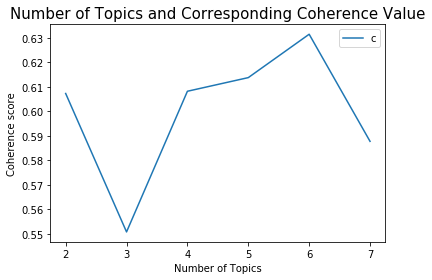

In [337]:
# Show graph
x = range(start, limit, step)
plt.title("Number of Topics and Corresponding Coherence Value", fontsize = 15)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [338]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 7))
    

Num Topics = 2  has Coherence Value of 0.6072725
Num Topics = 3  has Coherence Value of 0.5507233
Num Topics = 4  has Coherence Value of 0.6081838
Num Topics = 5  has Coherence Value of 0.6137566
Num Topics = 6  has Coherence Value of 0.6314735
Num Topics = 7  has Coherence Value of 0.5877241


In [339]:
optimal_model = model_list[2]
pprint(optimal_model.show_topics(formatted=False, num_topics=2))


[(2,
  [('like', 0.03004139),
   ('watch', 0.018542325),
   ('book', 0.016790278),
   ('good', 0.013342365),
   ('movie', 0.011727645),
   ('favorite', 0.011346213),
   ('read', 0.010993872),
   ('listen', 0.009997066),
   ('song', 0.009234976),
   ('ielt', 0.008901793)]),
 (3,
  [('language', 0.048785094),
   ('look', 0.047600694),
   ('speak', 0.04592337),
   ('practice', 0.042631377),
   ('native', 0.036470152),
   ('improve', 0.03421832),
   ('partner', 0.029109167),
   ('like', 0.02630811),
   ('speaker', 0.023290234),
   ('spanish', 0.021135483)])]


In [340]:
#vectorizer: count_vectorizer, TFIDF
#In this case, we want to use count_vectorizer since TFIDF penalize the most
#frequent words but in this case those frequent words like help, stress might 
#be very important to help us understand the effectiveness of the food

#add n-gram
#you can try different n-gram to see which method makes sense


#max frequency: a word that shows up max_df of the time will be left out
#min frenquency: a word that shows up less than min_df times will be left out

cv = CountVectorizer(ngram_range = (2,3), min_df = 5, max_df=0.5,stop_words=stop_added)
data_cv = cv.fit_transform(post.add_stop)


In [284]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        

In [341]:
from sklearn.decomposition import NMF

nmf = NMF(3)
cv_topic_nmf = nmf.fit_transform(data_cv)


In [342]:
display_topics(nmf, cv.get_feature_names(), 7)



Topic  0
new new, new new new, medium medium, medium medium medium, new study, new new study, word new

Topic  1
time new, new time, new time new, new love, new change, easy time, like time

Topic  2
accent grid, grid accent, accent list, accent list accent, list accent, accent grid accent, shade accent


In [293]:
post.to_pickle("./clean_post.pkl")


In [294]:
post = pd.read_pickle("./clean_post.pkl")


In [295]:
# Build LDA Model
start_time=time.time()

lda = LatentDirichletAllocation(n_components=3,          # Number of topics
#                                       max_iter=200,              # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
cv_topic_lda= lda.fit_transform(data_cv)

print("--- %s seconds ---" % (time.time() - start_time))


PicklingError: Could not pickle the task to send it to the workers.